# **Logistic Regression**
Logistic Regression can be used to estimate the probability that an instance/sample/example belongs to a particular class. For example, what is the probability that an email is spam? If the estimated probability is greater than 50% (or a given threshold), then the LR model will predict that an instance belongs to that class (the positive class, usually labeled "1" or sometimes "True"). Otherwise the LR model predicts it does not belong to that class, therefore it belongs to the negative class, usually labeled "0". 

Similar to Linear Regression, Logistic Regression computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly (like linear regression), it outputs the logistic of that result: $\hat{p} = h_{\theta}(\textbf{x}) = \sigma(\textbf{x}^T\theta)$.

The logistic ($\sigma(*)$) is a sigmoid function (S-shaped like we saw in class) that will output a number between 0 and 1. Once we estimate the probability $\hat{p}$ that an instance belongs to the positive class, then we can make the $\hat{y}$ prediction easily: $\hat{y} = 0  \text{ if } \hat{p} < 0.5 \text{ or } \hat{y} = 1 \text{ if } \hat{p} \geq 0.5$. 

**Training and Cost Function**

The training objective for LR is to set the parameter vector $\theta$ so that the LR model will estimate high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). This can be expressed with this cost function: $c(\theta) = -log(\hat{p}) \text{ if } y = 1, -log(1 - \hat{p}) \text{ if } y = 0$. 

The loss function for the whole training dataset is the average cost over all training instances. This is called the $\textit{log loss}$: $J(\theta) = - \frac{1}{m} \sum_{i=1}^{m}[y^{(i)}log(\hat{p^{(i)}}) + (1-y^{(i)})log(1-\hat{p^{(i)}})]$ and we can solve it using Gradient Descent. 

**Basic Setup**

In [1]:
# Import packages
import numpy as np
import sklearn

In [2]:
# For plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# To make this notebook's output stable across runs
np.random.seed(42)

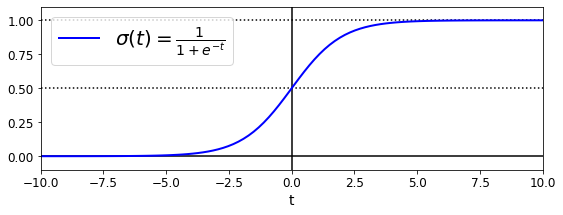

In [4]:
# Let's first visualize the logistic function

t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [5]:
# Load the Iris Dataset from Scikit Learn to train and test on

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [6]:
# Look at the dataset details

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# Working with only a Single Feature

In [7]:
# The data is in iris["data"] and target in iris["target"]
# For this section, we will work with a single feature 'petal width'
# which is the last (fourth) feature in iris["data"]
# We will assign class y=1 if the target's value is 2 and 0 otherwise
print(iris["feature_names"])
print(iris["target_names"])
# petal width
X = iris["data"][:,3]
# 1 if Iris virginica, else 0
y =  iris["target"] == 2

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [8]:
# Import the LogisticRegression class from scikit learn

from sklearn.linear_model import LogisticRegression


In [9]:
# Initialize the LogisticRegression class, use lbfgs solver and random state of 42

log_reg = LogisticRegression(solver="lbfgs", random_state=42)

In [10]:
# Fit the data
log_reg.fit(np.atleast_2d(X).T,y) # Make X matrix instead of array

LogisticRegression(random_state=42)

In [11]:
# Print the estimated coefficients of the learned function
coefficients = log_reg.coef_
intercept = log_reg.intercept_

print("Coefficients:", coefficients[0,0])
print("Intercept:", intercept[0])

Coefficients: 4.333084596585777
Intercept: -7.194708301503785


In [12]:
# Create new data and predict their classes
# Create 1000 new datapoints between 0 and 1 and predict their probability using the trained model

X_new =  np.linspace(0, 1, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

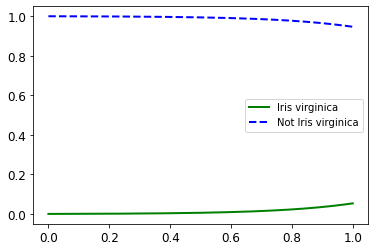

In [13]:
# Visualize the distribution of the two classes: Iris virginica and Not Iris virginica

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()

c:\Users\2003k\anaconda3\lib\site-packages\matplotlib\patches.py:1475: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


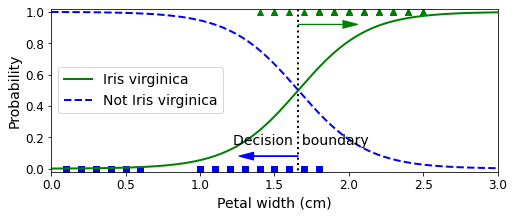

In [14]:
# A more detailed figure

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [15]:
# Check the decision boundary value

decision_boundary

array([1.66066066])

In [16]:
# Prediction on two sides of the boundary, one for value 1.7 and the other for value 1.5

log_reg.predict([[1.7], [1.5]])

array([ True, False])

# Working with Multiple Features

In [17]:
# This time, we will work with two features: petal length and petal width
# which are the 2nd and 3rd features (starting from 0th) in iris["data"]
# Write code to select those two features in X
# y remains the same as previous

X = iris["data"][:,2:]
y =  iris["target"] == 2

In [18]:
# Initialize a new LogisticRegression class and fit it with the new data

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

In [19]:
# Create new two-dimensional data for prediction
# You should use numpy's meshgrid to create a grid of 2D-points
# Create 500 points between 2.9 and 7 for x0 and 500 points between 0.8 and 2.7 for x1
# which are going to be the two features of the new data

x0, x1 = np.linspace(2.9, 7, 500), np.linspace(0.8, 2.7, 500)
X_new = np.array(np.meshgrid(x0, x1))
X_new = X_new.reshape(2, 500**2).T

In [20]:
# Predict the class-probabilities assigned to the new data created

y_proba = log_reg.predict_proba(X_new)

In [21]:
y_proba.shape

(250000, 2)

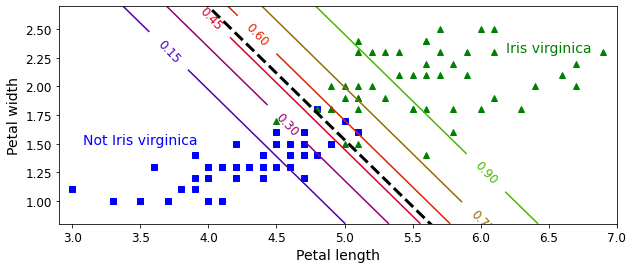

In [22]:
# Visualization

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape((500,500))
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# Working with Multiple Classes

In [23]:
# This time, we will still be working with two-dimensional features (same as previous)
# but with multiple classes. So we will no longer have just 0 and 1 but 0, 1, ..., c classes

X = iris["data"][:,2:]
y = iris["target"]

In [24]:
# Initialize a new multi-class solver
# You should use the multinomial flag for the attribute multi_class
# Then, fit the new data

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", random_state=42)
softmax_reg.fit(X,y)

LogisticRegression(multi_class='multinomial', random_state=42)

In [25]:
# We will work with the same new data X_new that we created in the previous section
# Predict the class probabilites and class predictions for X_new

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

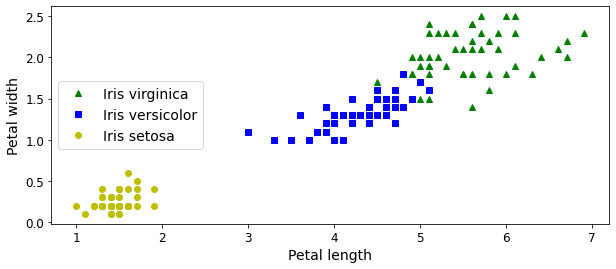

In [26]:
# Visualize them

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)

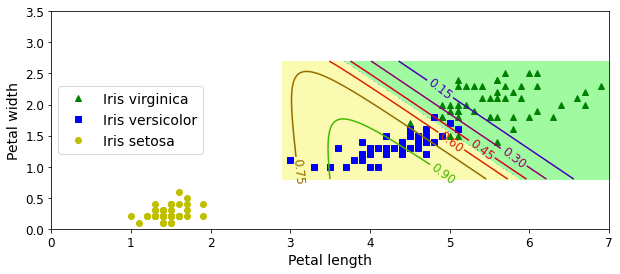

In [27]:
# Visualize along with the decision boundaries

zz1 = y_proba[:, 1].reshape((500,500))
zz = y_predict.reshape((500,500))

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [28]:
# You can predict class and probabilities for individual data points
# Predict and print the class and class-probabilities for the point (5, 2)

print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[2.43559894e-04 2.14859516e-01 7.84896924e-01]]
